In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df=pd.read_csv('KNN_Project_Data')

In [4]:
df.shape

(1000, 11)

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
XVPM,1000.0,1055.071157,370.980193,21.17,767.413366,1045.904805,1326.065178,2117.0
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0


In [8]:
df.corr()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004816,-0.014219,0.055256,0.003688,0.001883,-0.023526,0.032118,-0.016091,0.026222,-0.079896
GWYH,-0.004816,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014219,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055256,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.003688,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.001883,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.023526,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032118,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016091,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026222,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


<function matplotlib.pyplot.show(close=None, block=None)>

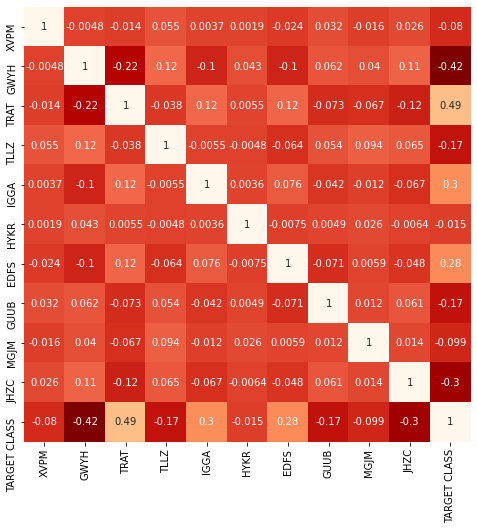

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cbar= False, cmap='')
plt.show

In [10]:

#sns.pairplot(df, hue='TARGET CLASS')
#plt.show()

In [11]:
x=df.drop('TARGET CLASS', axis=1)
x

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792
...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020


In [12]:
y=df['TARGET CLASS']
y

0      0
1      1
2      1
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
X_train=sc.fit_transform(X_train)

In [22]:
X_test=sc.transform(X_test)


In [25]:
X_train=pd.DataFrame(X_train, columns=x.columns)

In [26]:
X_test=pd.DataFrame(X_test, columns=x.columns)

In [27]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


In [28]:
X_train.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-1.594010,0.584541,-0.680589,0.885079,-0.331101,0.287269,-1.326559,0.583467,0.352073,1.651636
1,-1.478875,0.111455,-1.487069,0.478673,0.632534,-0.067932,1.287428,0.768341,1.248123,-0.786333
2,0.018348,1.832448,-0.340968,0.687772,1.152013,-0.923793,-0.521554,0.272773,0.089718,-2.203299
3,0.534513,0.331759,0.633546,0.190957,1.626781,0.501702,-0.078628,1.048279,-1.532975,-1.883207
4,-0.737274,-0.244397,0.577852,1.081180,0.667223,1.370688,-0.757630,0.664345,-0.087544,-1.752222


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate=[]
for i in range (1,50):
    knn_clas=KNeighborsClassifier(n_neighbors=i)
    knn_clas.fit(X_train,y_train)
    y_pred_i=knn_clas.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

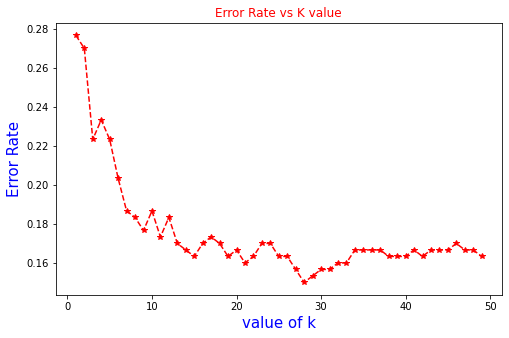

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1,50),error_rate,linestyle='--',color="red",marker='*')
plt.xlabel('value of k',color="blue",size=15)
plt.ylabel('Error Rate',color="blue",size=15)
plt.title('Error Rate vs K value', color="red")
plt.show()

In [32]:
knc=KNeighborsClassifier(n_neighbors=30)

In [33]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [34]:
knc.score(X_test,y_test)

0.8433333333333334

In [35]:
y_pred=knc.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
print('Accuracy Score:', accuracy_score(y_pred, y_test))

Accuracy Score: 0.8433333333333334


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       146
           1       0.87      0.82      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [39]:
confu_mat=confusion_matrix(y_test,y_pred)

In [40]:
print(confu_mat)

[[127  19]
 [ 28 126]]


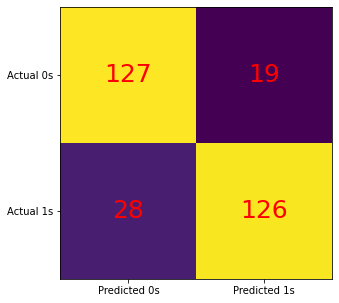

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(confu_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confu_mat[i, j], ha='center', va='center', color='red',size=25)
plt.show()